# Prepared By Aritra, for Friends



## IMPORTS

In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

## Defining the expected function

In [2]:
def func(x, m, c): # This is a straight line
    return m*x+c

## Data

```python
# EXAMPLE
xs = [1, 2, 3, 4, 5, 6, 7] # x data
ys = [1.2, 1.9, 3, 4.2, 4.8, 5.7, 7] # y data
```



In [3]:
# Fill the next two lines
# xs = [40, 42, 44, 45]
# xs = [2500, 1700, 1050, 800] # x data
xs = [1.900, 1.700, 1.050, .800] # x data
ys = [57.47681633, 45.95689115, 36.93474825, 32.76591554] # y data
# remember: length of xs and ys should be equal (due to obvious reasons)

# EXAMPLE
# xs = [1, 2, 3, 4, 5, 6, 7] # x data
# ys = [1.2, 1.9, 3, 4.2, 4.8, 5.7, 7] # y data
# plt.plot(xs, ys)

## Actual Curve - Fitting occurs in the next code cell
### Input: 
The curve_fit() function takes the first argument as the function name, next it takes the x-data and the y-data, finally we have an optional argument the "Guess" values, in this case we should have given a list of 2 numbers....

### Output:
This function returns two things,

1. popt (a list of two numbers here) they correspond to the values of the constants used in the defined function
2. pcov (a n*n matrix here n = 2) we get the error from this. We find the **square root of the diagonal elements** to find the error. The elements other than the diagonal elements are unimportant for us because the two constants are independent of each other.

###  [Learn more](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [4]:
popt, pcov = curve_fit(func, xs, ys)

## Showing Results

If the Equation is y = mx + c
For the best fit curve:
    m = 20.11483 ± 4.21391
    c = 15.87713 ± 6.04902

The curve looks like:


Text(0.5, 0.15, 'If the Equation is y = mx + c\nFor the best fit curve:\n    m = 20.11483 ± 4.21391\n    c = 15.87713 ± 6.04902\n')

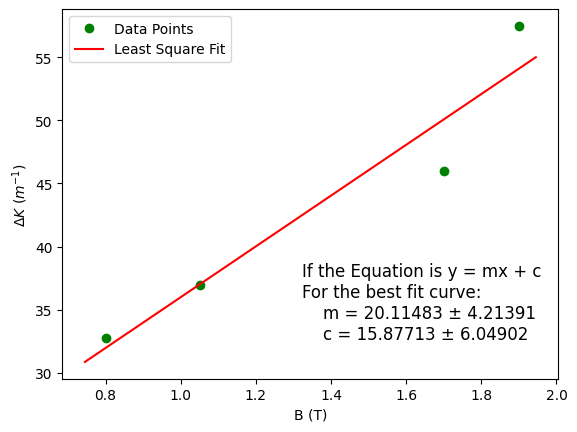

In [5]:
# RESULT OUPUT
text = "If the Equation is y = mx + c\nFor the best fit curve:\n"
text += f"    m = {round(popt[0], 5)} ± {round((pcov[0][0])**0.5, 5)}\n"
text += f"    c = {round(popt[1], 5)} ± {round((pcov[1][1])**0.5, 5)}\n"
print(text)
print("The curve looks like:")

# Just automating some stuffs....
span = max(xs) - min(xs)
a = 0.05 # This variable stores the amount of free space to be shown before the least point and 
# after the maximum point. Keep this value low for best results. 
factor = span*a

xFit = np.arange(min(xs)-factor, max(xs)+factor, 0.01) # np.arrange(start, stop, step), makes an array of numbers (range is chosen to match x data)
 
# Plotting the fout things... data points, fit, upper limit of error, lower limit of error
plt.plot(xs, ys, 'go') # go means green dots
 
plt.plot(xFit, func(xFit, popt[0], popt[1]), 'r')

# Comment out the next two lines if you want to hide error lines 
# plt.plot(xFit, func(xFit, popt[0]+((pcov[0][0])**0.5), popt[1]+((pcov[1][1])**0.5)), "b--") # "b--" means blue dashed lines
#                                ^                            ^
# plt.plot(xFit, func(xFit, popt[0]-((pcov[0][0])**0.5), popt[1]-((pcov[1][1])**0.5)), "b--")
#                                ^                            ^
 
plt.legend(["Data Points", "Least Square Fit", "Error"])
plt.xlabel("B (T)")
plt.ylabel("$\Delta K$ $(m^{-1})$")
plt.text(0.5, 0.15, text, fontsize=12, transform=plt.gcf().transFigure)
# plt.show()